<a name="top"></a>
# Valoración de datos

## Índice de contenidos
1. [Valoración de datos EEUU](#1)
2. [Valoracion de datos Dataset niñ@s](#2)
3. [Valoración de datos Ópticas](#3)


<a id="1"></a> <br>
### 1. Valoración de datos EEUU

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [211]:
eye_dis = pd.read_csv("./Data/Data_main/Prevelance of Eye Diseases in US.csv")
eye_dis["prevalence_rate"] = eye_dis["prevalence_rate"].str.replace('"',"").str.replace(",",".").astype(float)

In [238]:
eye_dis.head(10)

state vision_problem race     sex    age  number_of_cases  \
0  UNITED_STATES            AMD  ALL     ALL    ALL          2069403   
1  UNITED_STATES            AMD  ALL     ALL  50-54            79268   
2  UNITED_STATES            AMD  ALL     ALL  55-59            81083   
3  UNITED_STATES            AMD  ALL     ALL  60-64            95553   
4  UNITED_STATES            AMD  ALL     ALL  65-69           113107   
5  UNITED_STATES            AMD  ALL     ALL  70-74           150960   
6  UNITED_STATES            AMD  ALL     ALL  75-79           231373   
7  UNITED_STATES            AMD  ALL     ALL    80+          1318058   
8  UNITED_STATES            AMD  ALL  FEMALE    ALL          1347911   
9  UNITED_STATES            AMD  ALL  FEMALE  50-54            39242   

   prevalence_rate  population  
0           0.0209   142648393  
1           0.0036    22298125  
2           0.0041    19664805  
3           0.0057    16817924  
4           0.0091    12435263  
5           0.0163     9278166  
6           0.0316     7317795  
7           0.1173    11236760  
8           0.0254    75147949  
9           0.0035    11364851

In [213]:
eye_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            52260 non-null  object 
 1   vision_problem   52260 non-null  object 
 2   race             52260 non-null  object 
 3   sex              52260 non-null  object 
 4   age              52260 non-null  object 
 5   number_of_cases  52260 non-null  int64  
 6   prevalence_rate  52260 non-null  float64
 7   population       52260 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


 Dos dataframes , uno solo EEUU y otro de estados.

AMD = Age-Related Macular Degeneration

Los datos al principio no me encajaban en cuanto a prevalencias hasta que me di cuentas que los valores totales en la primera fila donde engloba los totales de cada problema visual y cada estado, no tiene el numero de personas que no tienen ningun problema, al comprobar la cuenta todo cuadraba y respiré tranquilo.

>Quiero tener por separado dos dataframe en los cuales aparezca de manera general(todas las razas, sexos y edades) para poder llevar a cabo la labor de identificación de cual es la enfermedad con mayor predominancia en general y separado por cada estado

In [214]:
cond_1 = eye_dis["age"] == "ALL"
cond_2 = eye_dis["race"] == "ALL"
cond_3 = eye_dis["sex"] == "ALL"
cond_sts = eye_dis["state"] != "UNITED_STATES"
cond_usa = eye_dis["state"] == "UNITED_STATES"

eeuu_only_all = eye_dis[cond_1 & cond_2 & cond_3 & cond_usa]
states_only_all = eye_dis[cond_1 & cond_2 & cond_3 & cond_sts]

In [215]:
EEUU_probl_prv = eeuu_only_all.pivot_table(index='state', columns='vision_problem', values='prevalence_rate')
states_probl_prv = states_only_all.pivot_table(index='state', columns='vision_problem', values='prevalence_rate')

In [216]:
EEUU_probl_prv

vision_problem     AMD  BLINDNESS  CATARACT  DIABETIC_RETINOPATHY  GLAUCOMA  \
state                                                                         
UNITED_STATES   0.0209      0.009    0.1711                0.0539    0.0191   

vision_problem  HYPEROPIA  MYOPIA  VISION_IMPAIRMENT  
state                                                 
UNITED_STATES      0.0995  0.2392             0.0204

In [217]:
print("La predominancia de problemas visuales de esta muestra es del",100*EEUU_probl_prv.loc["UNITED_STATES"].sum(),"%")
print("De los cuales la mayor predominancia sobre todas ellas es la miopia con un",100*(EEUU_probl_prv.loc["UNITED_STATES"].max().round(3)),"%")
EEUU_probl_prv["EMMETROPIC"] = 1 - EEUU_probl_prv.loc['UNITED_STATES'].sum()  #Añadimos otra columna a este dataframe para visualizar también la gente que no tiene problemas en esta muestra de gente.

La predominancia de problemas visuales de esta muestra es del 63.31 %
De los cuales la mayor predominancia sobre todas ellas es la miopia con un 23.9 %


>Observamos graficamente como la predominante es la Miopia sobre todas ellas

Quiero que se vea representado en porcentajes las prevalencias

In [218]:
EEUU_probl_prv = EEUU_probl_prv * 100

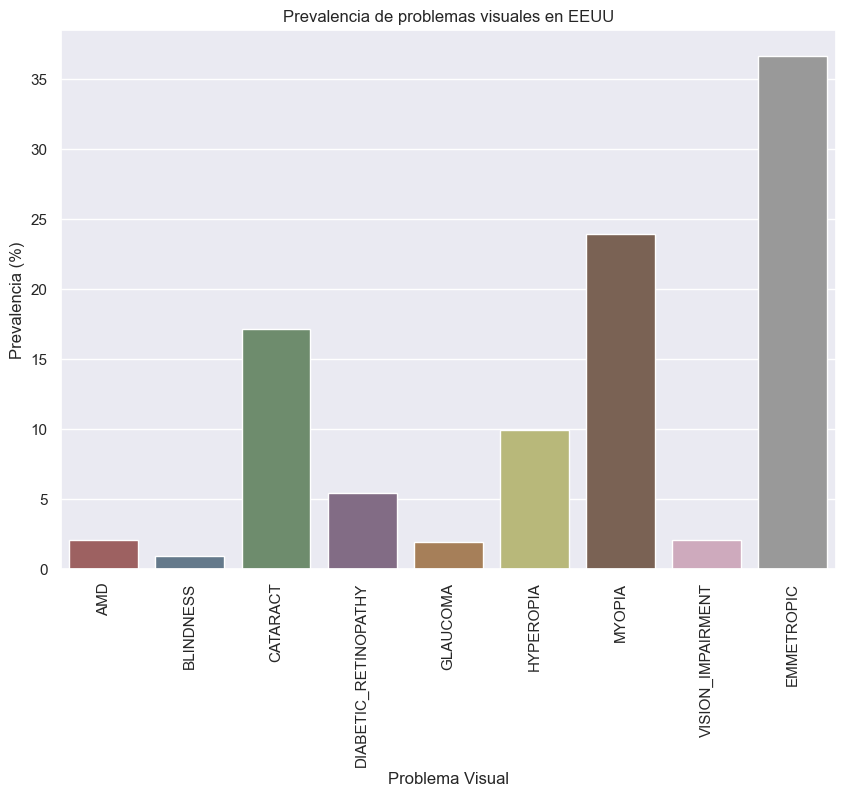

In [219]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=EEUU_probl_prv,palette="Set1",saturation=0.3)
plt.xticks(rotation=90);
plt.title("Prevalencia de problemas visuales en EEUU")
plt.xlabel("Problema Visual")
plt.ylabel("Prevalencia (%)")
sns.set(style="darkgrid")

En cada estado el diagrama de barras es el siguiente

In [220]:
states_probl_prv.head()

vision_problem     AMD  BLINDNESS  CATARACT  DIABETIC_RETINOPATHY  GLAUCOMA  \
state                                                                         
ALABAMA         0.0191      0.009    0.1720                0.0521    0.0208   
ALASKA          0.0120      0.005    0.1239                0.0469    0.0142   
ARIZONA         0.0206      0.008    0.1792                0.0577    0.0178   
ARKANSAS        0.0214      0.009    0.1805                0.0524    0.0193   
CALIFORNIA      0.0188      0.008    0.1615                0.0582    0.0188   

vision_problem  HYPEROPIA  MYOPIA  VISION_IMPAIRMENT  
state                                                 
ALABAMA            0.0985  0.2333             0.0182  
ALASKA             0.0861  0.2579             0.0113  
ARIZONA            0.1043  0.2351             0.0206  
ARKANSAS           0.1053  0.2423             0.0201  
CALIFORNIA         0.0915  0.2251             0.0205

In [221]:
states_probl_prv["EMMETROPIC"] = 1 - states_probl_prv.sum(axis=1)

In [222]:
states_probl_prv = states_probl_prv * 100

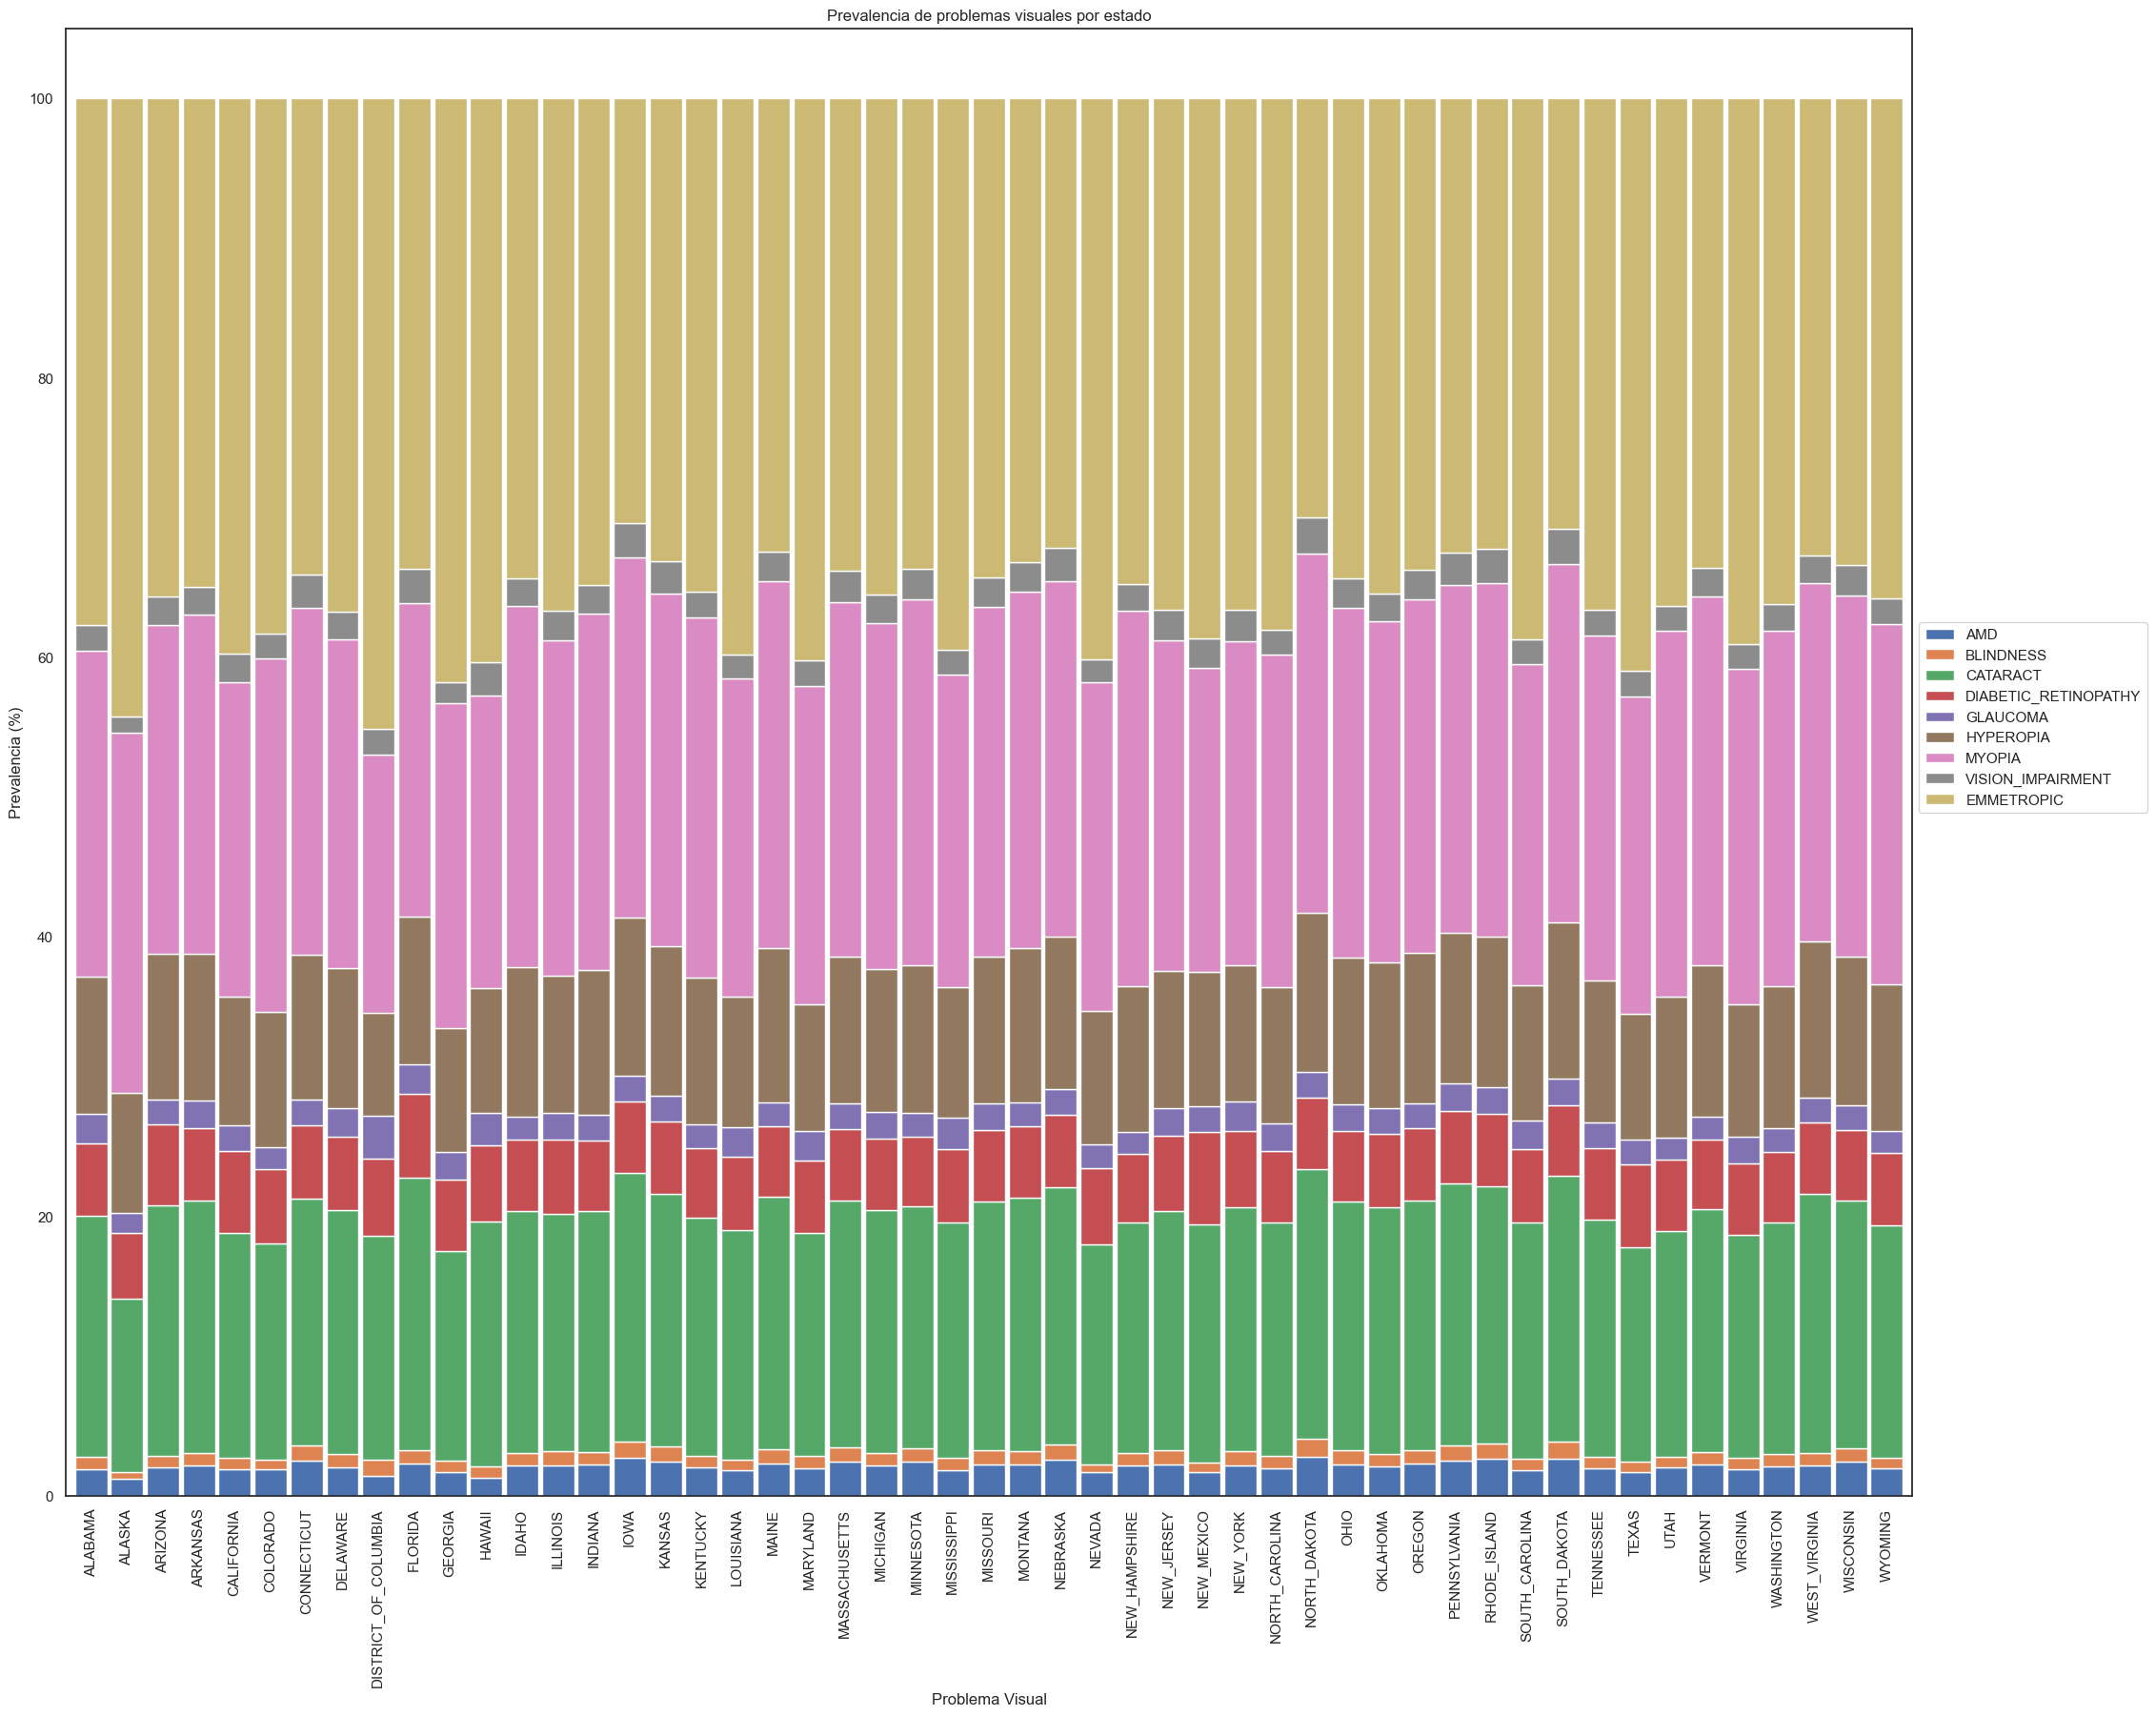

In [233]:
fig, ax = plt.subplots(figsize=(25, 20))
states_probl_prv.plot(kind="bar",stacked=True, ax=ax, width = 0.9)
ax.legend(bbox_to_anchor=(1, 0.6), loc='upper left');
plt.title("Prevalencia de problemas visuales por estado")
plt.xlabel("Problema Visual")
plt.ylabel("Prevalencia (%)")
sns.set(style="white")



En cuanto al numero de casos en general y por estado es el siguiente

In [14]:
EEUU_probl_cses = eeuu_only_all.pivot_table(index='state', columns='vision_problem', values='number_of_cases')
states_probl_cses = states_only_all.pivot_table(index='state', columns='vision_problem', values='number_of_cases')

In [250]:
142648393 - EEUU_probl_cses.sum(axis=1)

state
UNITED_STATES    53262332
dtype: int64

In [113]:
states_probl_cses.head()

vision_problem     AMD  BLINDNESS  CATARACT  DIABETIC_RETINOPATHY  GLAUCOMA  \
state                                                                         
ALABAMA          30359      19527    387030                117199     46778   
ALASKA            2357       1365     37036                 14012      4250   
ARIZONA          41655      23482    512075                164797     50879   
ARKANSAS         20787      12684    245571                 71318     26300   
CALIFORNIA      203405     130011   2606606                939418    303306   

vision_problem  HYPEROPIA   MYOPIA  VISION_IMPAIRMENT  
state                                                  
ALABAMA            221731   525188              40856  
ALASKA              25738    77104               3364  
ARIZONA            298072   671647              58835  
ARKANSAS           143278   329724              27326  
CALIFORNIA        1477996  3633510             331727

El 62,66 % de la muestra de 142648393 tiene algun tipo de problema grave de visión

## Un dataframe por tipo de problema

In [16]:
miopia_gen= states_only_all[states_only_all["vision_problem"] == "MYOPIA"]
hipermetropia_gen = states_only_all[states_only_all["vision_problem"] == "HYPEROPIA"]
amd_gen = states_only_all[states_only_all["vision_problem"] == "AMD"]
blindness_gen = states_only_all[states_only_all["vision_problem"] == "BLINDNESS"]
cataratas_gen = states_only_all[states_only_all["vision_problem"] == "CATARACT"]
retinodiabetica_gen = states_only_all[states_only_all["vision_problem"] == "DIABETIC_RETINOPATHY"]
glaucoma_gen = states_only_all[states_only_all["vision_problem"] == "GLAUCOMA"]
blindness_gen = states_only_all[states_only_all["vision_problem"] == "VISION_IMPAIRMENT"]



In [55]:
states_only_all["state"].unique()


array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

Como vemos hay 51 estados...pero hay 51 estados? No, está contando District of Columbia como un estado, aunque es un distrito federal. De ahí que las medias de los estados sean diferentes a las medias de EEUU generales, como veremos a continuación.

Quiero hacer una grafica por cada estado y ver prevalencias en cada estado.

In [48]:
states_only_all[states_only_all["state"] == "ALABAMA"]

state        vision_problem race  sex  age  number_of_cases  \
1005  ALABAMA                   AMD  ALL  ALL  ALL            30359   
1125  ALABAMA             BLINDNESS  ALL  ALL  ALL            19527   
1260  ALABAMA              CATARACT  ALL  ALL  ALL           387030   
1395  ALABAMA  DIABETIC_RETINOPATHY  ALL  ALL  ALL           117199   
1470  ALABAMA              GLAUCOMA  ALL  ALL  ALL            46778   
1605  ALABAMA             HYPEROPIA  ALL  ALL  ALL           221731   
1740  ALABAMA                MYOPIA  ALL  ALL  ALL           525188   
1875  ALABAMA     VISION_IMPAIRMENT  ALL  ALL  ALL            40856   

      prevalence_rate  population  
1005           0.0191     2250750  
1125           0.0090     2250750  
1260           0.1720     2250750  
1395           0.0521     2250750  
1470           0.0208     2250750  
1605           0.0985     2250750  
1740           0.2333     2250750  
1875           0.0182     2250750

In [53]:
alabama_id_prev = states_only_all[states_only_all["state"] == "ALABAMA"]["prevalence_rate"].idxmax()
alabama_prev = round(states_only_all.loc[alabama_id_prev,"prevalence_rate"] * 100, 2)
alabama_prev_type = states_only_all.loc[alabama_id_prev,"vision_problem"] 
print(alabama_prev)
print(alabama_prev_type) 

23.33
MYOPIA


Siguiendo esta estructura, voy a crear un bucle que me permita hacer un data frame con los problemas de vision prevalente en cada estado. Voy a crear primero una lista vacia la cual voy a ir acumulando los resultado del apartado anterior pero generalizandolo con todos y hacemos otro dataframe de ello

In [77]:
results = []
for state in states_only_all["state"].unique(): # Hacemos bucle de todos los estados
    state_id_prev = states_only_all[states_only_all["state"] == state]["prevalence_rate"].idxmax() #Averiguamos la posicion de mayor prevalencia en el index
    state_prev = round(states_only_all.loc[state_id_prev,"prevalence_rate"] * 100, 2) #Conseguimos la prevalencia y la pasamos a porcentajes
    state_prev_type = states_only_all.loc[state_id_prev,"vision_problem"] #Conseguimos el nombre de problema con mayor prevalencia

    results.append([state,state_prev,state_prev_type]) # Añadimos a la lista results del inicio
states_prev_df = pd.DataFrame(results,columns=["Estado", "Prevalencia", "Tipo_de_problema"]) #Añadimos los resultados a un Dataframe.



In [78]:
print(states_prev_df["Tipo_de_problema"].unique()) #Comprobamos que la mas predominantes en todos los estados es la miopia

['MYOPIA']


In [84]:
states_prev_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            51 non-null     object 
 1   Prevalencia       51 non-null     float64
 2   Tipo_de_problema  51 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [141]:
states_prev_df["Prevalencia"].min()

18.49

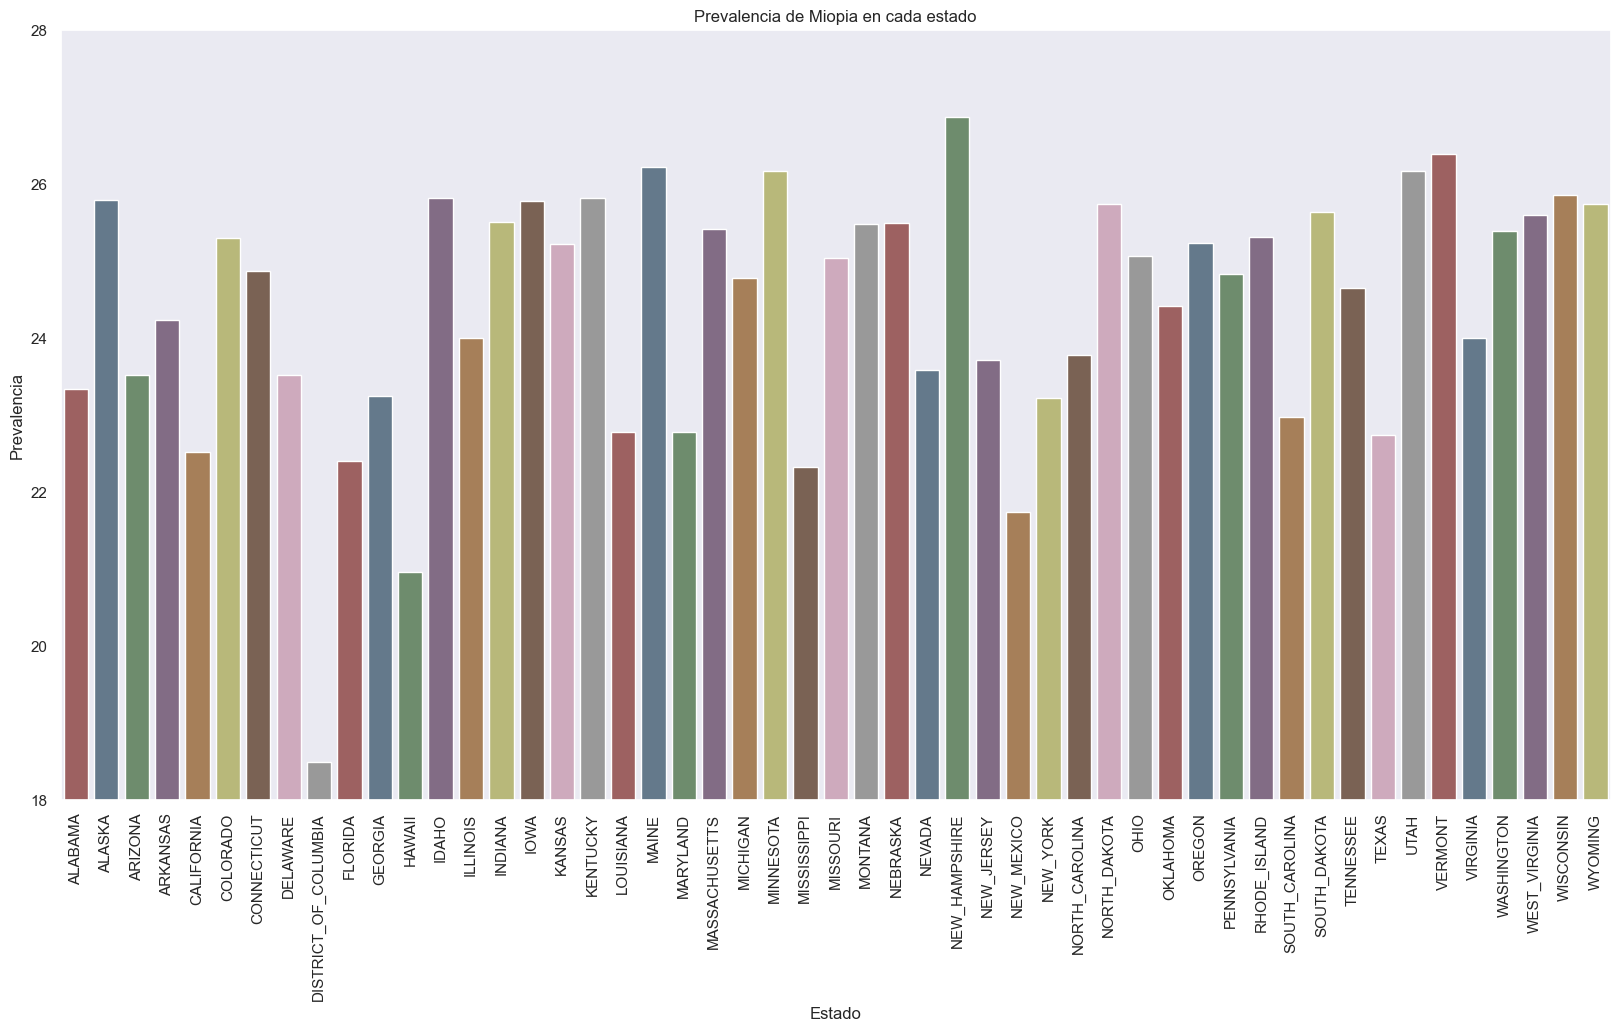

In [159]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=states_prev_df, x="Estado", y="Prevalencia",palette="Set1",saturation=0.3)
plt.xticks(rotation=90);
plt.ylim(18,28)
plt.title("Prevalencia de Miopia en cada estado")
sns.set(style="dark")



<a id="2"></a> <br>
### Valoracion de datos Dataset niñ@s


In [3]:
myopia_data = pd.read_csv("./Data/Data_main/myopia.csv",sep=";")

In [6]:
myopia_data.info()
myopia_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         618 non-null    int64  
 1   STUDYYEAR  618 non-null    int64  
 2   MYOPIC     618 non-null    int64  
 3   AGE        618 non-null    int64  
 4   GENDER     618 non-null    int64  
 5   SPHEQ      618 non-null    float64
 6   AL         618 non-null    float64
 7   ACD        618 non-null    float64
 8   LT         618 non-null    float64
 9   VCD        618 non-null    float64
 10  SPORTHR    618 non-null    int64  
 11  READHR     618 non-null    int64  
 12  COMPHR     618 non-null    int64  
 13  STUDYHR    618 non-null    int64  
 14  TVHR       618 non-null    int64  
 15  DIOPTERHR  618 non-null    int64  
 16  MOMMY      618 non-null    int64  
 17  DADMY      618 non-null    int64  
dtypes: float64(5), int64(13)
memory usage: 87.0 KB


ID  STUDYYEAR  MYOPIC  AGE  GENDER  SPHEQ     AL    ACD     LT    VCD  \
0      1       1992       1    6       1 -0.052  21.89  3.690  3.498  14.70   
1      2       1995       0    6       1  0.608  22.38  3.702  3.392  15.29   
2      3       1991       0    6       1  1.179  22.49  3.462  3.514  15.52   
3      4       1990       1    6       1  0.525  22.20  3.862  3.612  14.73   
4      5       1995       0    5       0  0.697  23.29  3.676  3.454  16.16   
..   ...        ...     ...  ...     ...    ...    ...    ...    ...    ...   
613  614       1995       1    6       0  0.678  22.40  3.663  3.803  14.93   
614  615       1993       0    6       1  0.665  22.50  3.570  3.378  15.56   
615  616       1995       0    6       0  1.834  22.94  3.624  3.424  15.89   
616  617       1991       0    6       1  0.665  21.92  3.688  3.598  14.64   
617  618       1994       0    6       0  0.802  22.26  3.530  3.484  15.25   

     SPORTHR  READHR  COMPHR  STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  
0         45       8       0        0    10         34      1      1  
1          4       0       1        1     7         12      1      1  
2         14       0       2        0    10         14      0      0  
3         18      11       0        0     4         37      0      1  
4         14       0       0        0     4          4      1      0  
..       ...     ...     ...      ...   ...        ...    ...    ...  
613        2       0       7        3    14         37      1      0  
614        6       0       1        0     8         10      1      1  
615        8       0       0        0     4          4      1      1  
616       12       2       1        0    15         23      0      0  
617       25       0       2        0    10         14      1      1  

[618 rows x 18 columns]

Primero cambiamos los valores de 0 y 1 en 

In [7]:
myopia_data["MYOPIC"] = myopia_data['MYOPIC'].replace({0: False, 1: True})
myopia_data["MOMMY"] = myopia_data['MOMMY'].replace({0: False, 1: True})
myopia_data["DADMY"] = myopia_data['DADMY'].replace({0: False, 1: True})
myopia_data["GENDER"] = myopia_data['GENDER'].replace({0: "Male", 1: "Female"})



Primero vamos a intentar probar que el componente genetico tiene importancia en si una persona es miope o no

In [8]:
myopia_data["MYOPIC ONLY DAD"] = (myopia_data["MYOPIC"] == True) & (myopia_data["DADMY"] == True) & (myopia_data["MOMMY"] == False)
myopia_data["MYOPIC ONLY MOM"] = (myopia_data["MYOPIC"] == True) & (myopia_data["MOMMY"] == True) & (myopia_data["DADMY"] == False)
myopia_data["MYOPIC MOM & DAD"] = (myopia_data["MYOPIC"] == True) & (myopia_data["MOMMY"] == True) & (myopia_data["DADMY"] == True)

In [9]:
myopia_data

ID  STUDYYEAR  MYOPIC  AGE  GENDER  SPHEQ     AL    ACD     LT    VCD  \
0      1       1992    True    6  Female -0.052  21.89  3.690  3.498  14.70   
1      2       1995   False    6  Female  0.608  22.38  3.702  3.392  15.29   
2      3       1991   False    6  Female  1.179  22.49  3.462  3.514  15.52   
3      4       1990    True    6  Female  0.525  22.20  3.862  3.612  14.73   
4      5       1995   False    5    Male  0.697  23.29  3.676  3.454  16.16   
..   ...        ...     ...  ...     ...    ...    ...    ...    ...    ...   
613  614       1995    True    6    Male  0.678  22.40  3.663  3.803  14.93   
614  615       1993   False    6  Female  0.665  22.50  3.570  3.378  15.56   
615  616       1995   False    6    Male  1.834  22.94  3.624  3.424  15.89   
616  617       1991   False    6  Female  0.665  21.92  3.688  3.598  14.64   
617  618       1994   False    6    Male  0.802  22.26  3.530  3.484  15.25   

     ...  READHR  COMPHR  STUDYHR  TVHR  DIOPTERHR  MOMMY  DADMY  \
0    ...       8       0        0    10         34   True   True   
1    ...       0       1        1     7         12   True   True   
2    ...       0       2        0    10         14  False  False   
3    ...      11       0        0     4         37  False   True   
4    ...       0       0        0     4          4   True  False   
..   ...     ...     ...      ...   ...        ...    ...    ...   
613  ...       0       7        3    14         37   True  False   
614  ...       0       1        0     8         10   True   True   
615  ...       0       0        0     4          4   True   True   
616  ...       2       1        0    15         23  False  False   
617  ...       0       2        0    10         14   True   True   

     MYOPIC ONLY DAD  MYOPIC ONLY MOM  MYOPIC MOM & DAD  
0              False            False              True  
1              False            False             False  
2              False            False             False  
3               True            False             False  
4              False            False             False  
..               ...              ...               ...  
613            False             True             False  
614            False            False             False  
615            False            False             False  
616            False            False             False  
617            False            False             False  

[618 rows x 21 columns]

In [10]:
personas_miope_madre = len(myopia_data[myopia_data['MYOPIC ONLY MOM']])
prob = (personas_miope_madre / len(myopia_data))
prob

0.032362459546925564

In [124]:
personas_miope_padre = len(myopia_data[myopia_data['MYOPIC ONLY DAD']])
prob = personas_miope_padre / len(myopia_data) *100
prob

3.3980582524271843

In [125]:
personas_miope_padre_madre = len(myopia_data[myopia_data['MYOPIC MOM & DAD']])
prob = personas_miope_padre_madre / len(myopia_data) *100
prob

5.6634304207119746

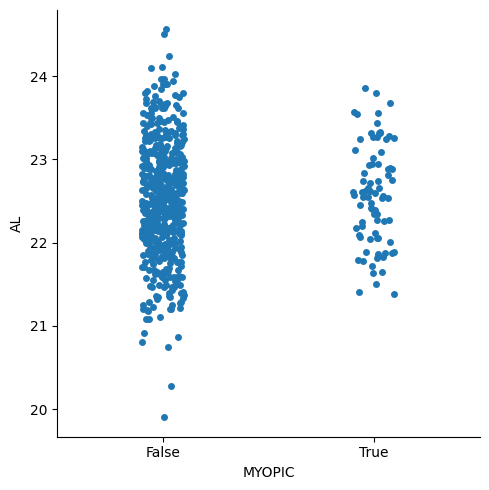

In [126]:
sns.catplot(x="MYOPIC", y="AL", data=myopia_data); 

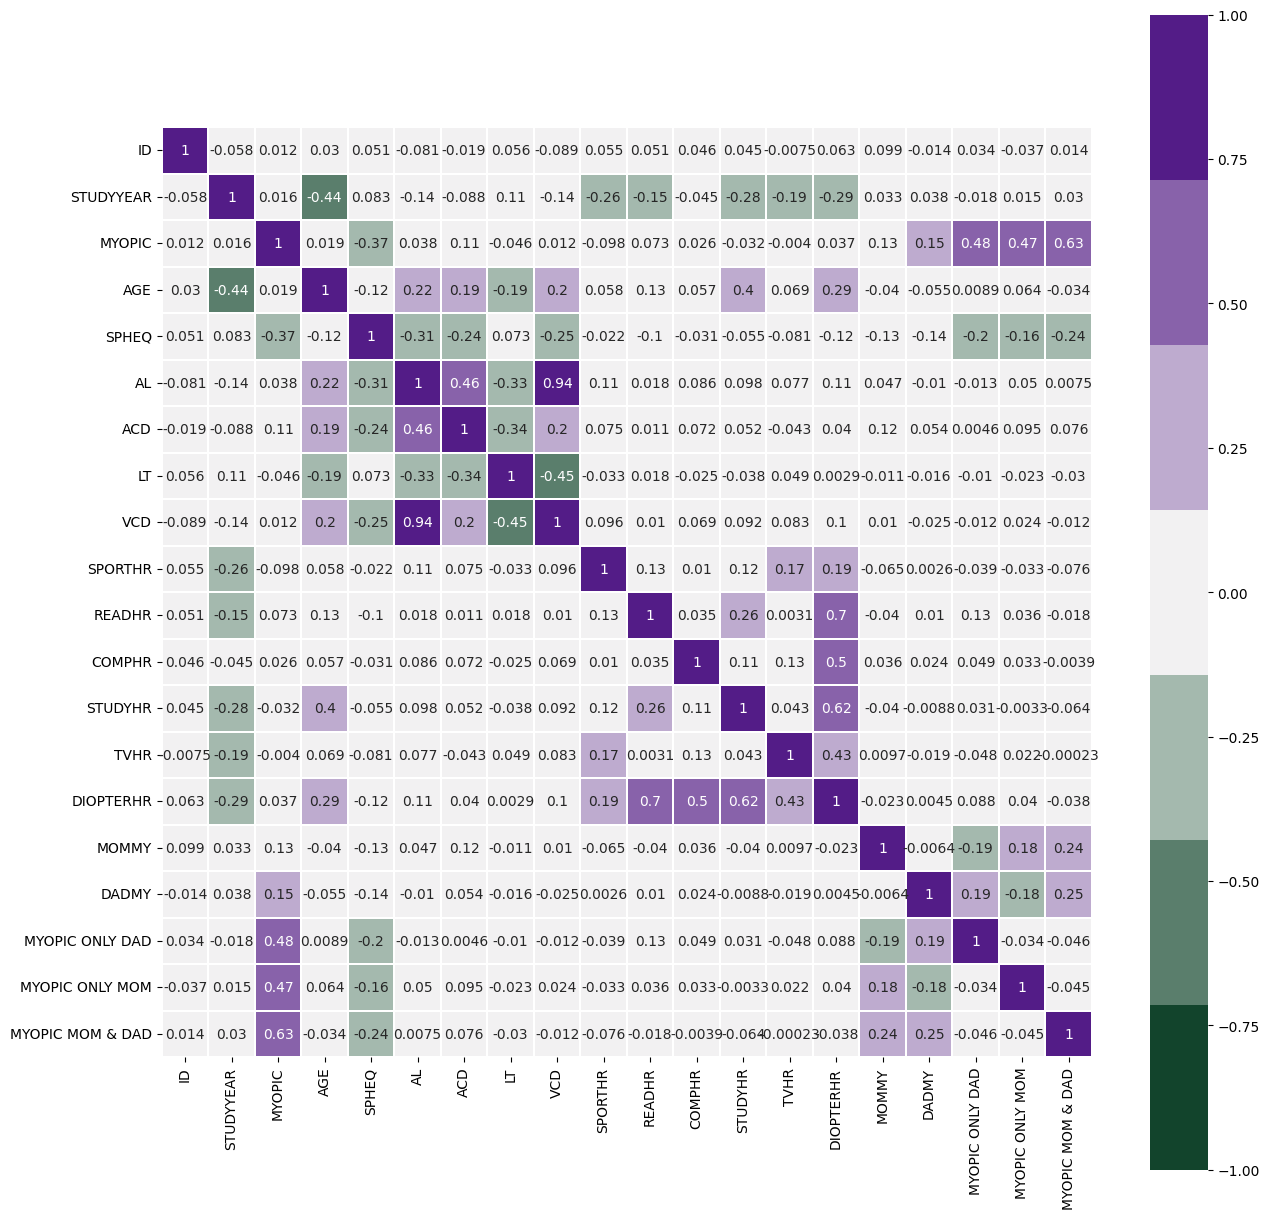

In [127]:
plt.figure(figsize=(15,15))
sns.heatmap(myopia_data.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

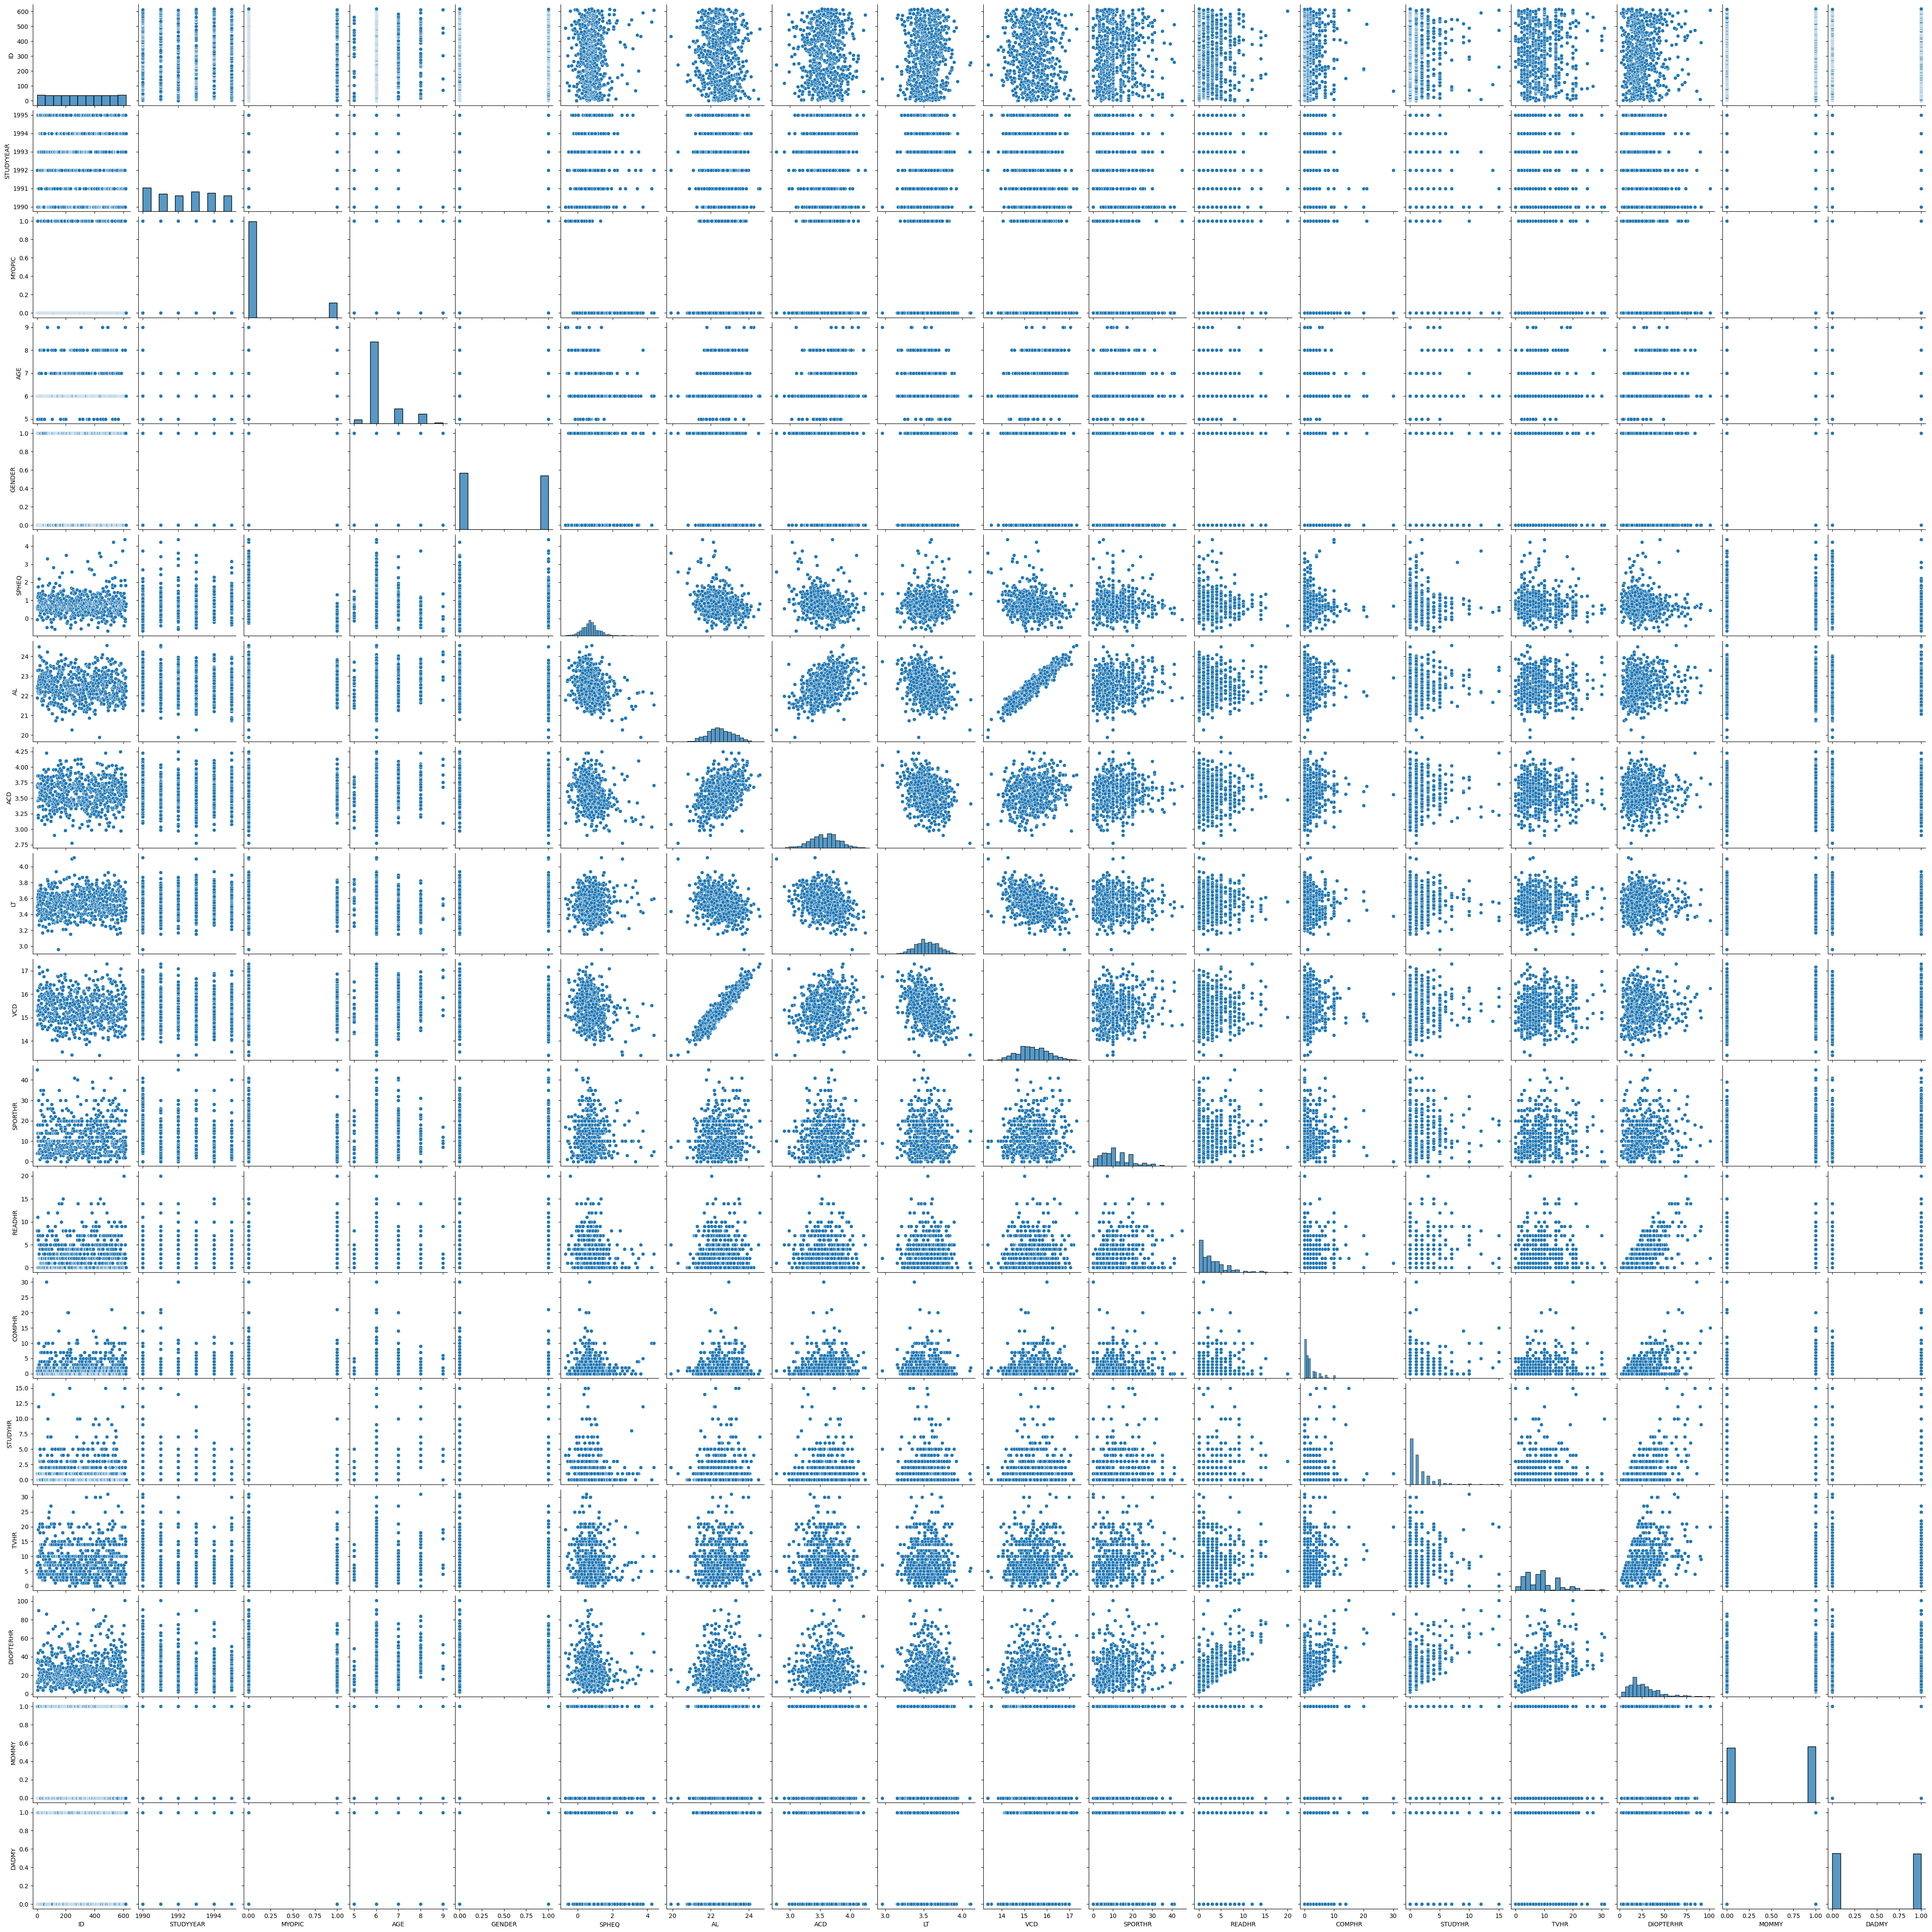

In [6]:
sns.pairplot(myopia_data)

a mayor AL menor potencia  mayor potencial de miope

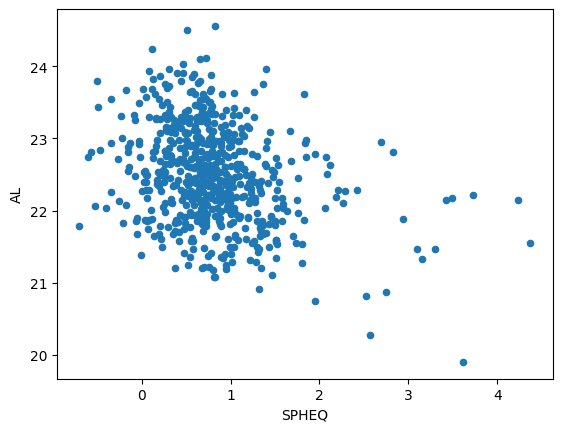

In [96]:
myopia_data.plot("SPHEQ","AL",kind="scatter",legend=False);

In [7]:
np.corrcoef(array_spheq, array_vcd)

array([[ 1.       , -0.2471303],
       [-0.2471303,  1.       ]])

In [8]:
np.corrcoef(array_spheq, array_al)

array([[ 1.        , -0.30551199],
       [-0.30551199,  1.        ]])

In [97]:
myopia_data.groupby("STUDYYEAR")["MYOPIC"].head().count()

30

# Pruebas


In [4]:
myopia_data["MYOPIC"].sum()

81

In [26]:
print((81/618)/(313/618))
print((81/618)/(310/618))

0.25878594249201275
0.26129032258064516


In [22]:
(myopia_data["DADMY"] == True).value_counts()

False    310
True     308
Name: DADMY, dtype: int64

In [5]:
(myopia_data["MYOPIC"].sum() / len(myopia_data) * 100).round(2)

13.11

Un 13.11 % de los niños de la muestra tienen miopia.

<a id="3"></a> <br>
### Valoración de datos Ópticas

Una vez vistos los datos y sus relaciones, queremos ver cual es la mejor solucion economica para paliar este tipo de problemas(incluyendo tambien en este caso miopia,hipermetropia y astigmatismo)

In [100]:
opt_prod = pd.read_csv("./Data/Data_main/todo_conc_opticas.csv",index_col=0)

In [101]:
opt_prod.head()

Empresa                Nombre completo           Categoria  \
0  Alain Afflelou  ACUVUE® OASYS MAX 1-Day - 30L  Lentes de contacto   
1  Alain Afflelou   AIR OPTIX AQUA ESFÉRICA - 3L  Lentes de contacto   
2  Alain Afflelou     AIR OPTIX NIGHT & DAY - 6L  Lentes de contacto   
3  Alain Afflelou     AIR OPTIX NIGHT & DAY - 6L  Lentes de contacto   
4  Alain Afflelou   AIR OPTIX ESFÉRICA AQUA - 6L  Lentes de contacto   

    Producto Reemplazo  Precio  
0     Acuvue   Diarias    40.0  
1  Air Optix   Mensual    31.0  
2  Air Optix   Mensual    77.0  
3  Air Optix   Mensual    77.0  
4  Air Optix   Mensual    48.5

In [102]:
opt_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Empresa          716 non-null    object 
 1   Nombre completo  716 non-null    object 
 2   Categoria        716 non-null    object 
 3   Producto         716 non-null    object 
 4   Reemplazo        164 non-null    object 
 5   Precio           716 non-null    float64
dtypes: float64(1), object(5)
memory usage: 39.2+ KB


In [103]:
opt_prod_not_na = opt_prod[opt_prod["Reemplazo"].notna()]

In [104]:
opt_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 0 to 715
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Empresa          716 non-null    object 
 1   Nombre completo  716 non-null    object 
 2   Categoria        716 non-null    object 
 3   Producto         716 non-null    object 
 4   Reemplazo        164 non-null    object 
 5   Precio           716 non-null    float64
dtypes: float64(1), object(5)
memory usage: 39.2+ KB


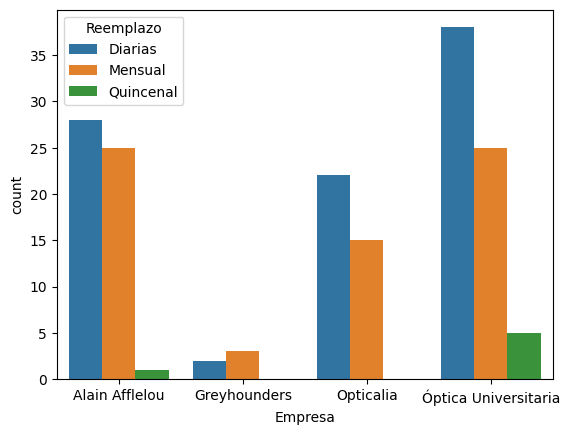

In [112]:
sns.countplot(x=opt_prod_not_na["Empresa"],hue=opt_prod_not_na["Reemplazo"]);

<Figure size 1000x1000 with 0 Axes>

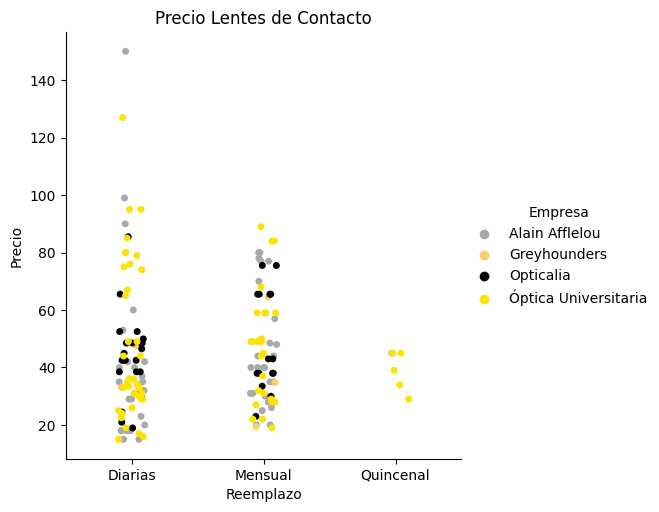

In [108]:
plt.figure(figsize=(10,10))
list_colors = ["#A7AAAC","#FDCD68","#000000","#FCE300"]
sns.catplot(x="Reemplazo", y="Precio", hue="Empresa", data=opt_prod_not_na, palette=list_colors); 
plt.title("Precio Lentes de Contacto", loc="center");

sacar media mensual, diaria y quincenal de cada uno.

In [16]:
round(opt_prod.groupby(["Empresa","Categoria"])["Precio"].mean(),2)

Empresa               Categoria                  
Alain Afflelou        Lentes de contacto              42.25
                      Líquidos                        14.65
                      Ofertas montura + cristales    116.08
Greyhounders          Lentes de contacto              39.89
                      Líquidos                         5.40
                      Ofertas montura + cristales     42.75
Opticalia             Lentes de contacto              46.17
                      Líquidos                         8.88
                      Ofertas montura + cristales    101.93
Óptica Universitaria  Lentes de Contacto              46.56
                      Líquidos                         7.92
                      Ofertas montura + cristales     60.61
Name: Precio, dtype: float64

In [17]:
round(opt_prod.groupby(["Empresa","Categoria"])["Precio"].max(),2)

Empresa               Categoria                  
Alain Afflelou        Lentes de contacto             150.00
                      Líquidos                        31.30
                      Ofertas montura + cristales    159.00
Greyhounders          Lentes de contacto              64.52
                      Líquidos                         6.90
                      Ofertas montura + cristales     59.00
Opticalia             Lentes de contacto              85.50
                      Líquidos                        12.00
                      Ofertas montura + cristales    119.90
Óptica Universitaria  Lentes de Contacto             127.00
                      Líquidos                        15.00
                      Ofertas montura + cristales     91.25
Name: Precio, dtype: float64

In [18]:
round(opt_prod.groupby(["Empresa","Categoria"])["Precio"].min(),2)

Empresa               Categoria                  
Alain Afflelou        Lentes de contacto             15.00
                      Líquidos                        5.50
                      Ofertas montura + cristales    39.00
Greyhounders          Lentes de contacto             19.46
                      Líquidos                        3.90
                      Ofertas montura + cristales    29.00
Opticalia             Lentes de contacto             18.95
                      Líquidos                        6.00
                      Ofertas montura + cristales    79.00
Óptica Universitaria  Lentes de Contacto             15.00
                      Líquidos                        2.50
                      Ofertas montura + cristales    32.00
Name: Precio, dtype: float64

In [ ]:
opt_prod.groupby(["Empresa","Categoria",)["Precio"]